In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [1]:
import cv2 # special package inside open CV 

In [2]:
cv2.__version__

'4.7.0'

In [3]:
import matplotlib.pyplot as plt

In [4]:
#mobile net is pzzzzzzza  re-trained model for image recognition and object analysis. It`s frozen model is avilable in public as a .pb 
# file. We have used that, as mentioned below. It required some additional configurations, which is provided by the pbtext file
config_file = r'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = r'frozen_inference_graph.pb'


In [5]:
model=cv2.dnn_DetectionModel(frozen_model,config_file)

In [6]:
# class label file has been downloaded. This is used as enumerator to make the int output provided into text.
# currently, mobile net works for 80 classes. Though we add new classes for the label file, it will not work, hecnce the
# model is not trained
classLabels=[]
file_name=r"Labels.txt"
with open (file_name,'rt') as fpt:
    classLabels=fpt.read().rstrip('\n').split('\n')

In [7]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [8]:
# some adjustments are made to the input. Then the captured input will go through these adjustments. Becz, that1s how config
# file is organized and , once satisfying these adjusments only, the model can effectively asses the input images / videos
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 0000019EF2974970>

In [9]:
img=cv2.imread(r'nightcar.jpg')

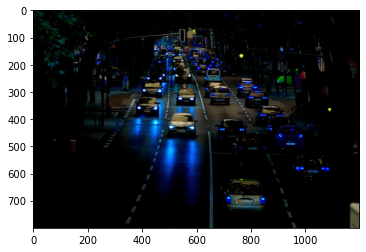

In [10]:
plt.imshow(img) # this is why we need pyplotlib

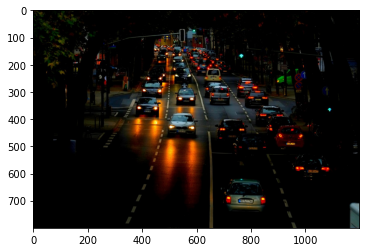

In [11]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB)) # some color change filter

In [12]:
ClassIndex,confidence,bbox=model.detect(img,confThreshold=0.5) # if the detection confidence is more than 50% display the o/p

In [13]:
print(bbox) # numerical predications of classes. Check with the class label list, strating from 1. Then, those are 
# man and car

[[229  83 895 557]
 [490 374 107  93]
 [648 271  70  55]
 [823 349 107  72]
 [763 267  80  62]
 [367 313  78  79]
 [303 173 680 378]
 [872 407 126 107]
 [958 220  43  85]
 [531 270  68  64]
 [726 270  52  45]
 [323 126 536 347]
 [770 300  85  64]
 [685 614 174 145]
 [823 366 109  82]
 [412 209 483 284]
 [962 222  51 135]
 [735 443 128  95]
 [652 246  58  40]
 [384 311  87  82]
 [645 299  80  55]]


In [14]:
font_scale=2
count=0
font=cv2.FONT_HERSHEY_PLAIN # bounding box text
for ClassInd,conf,boxes in zip(ClassIndex.flatten(),confidence.flatten(),bbox):
    # configuration of bounding box and associated text
    cv2.rectangle(img,boxes,(255,0,0),2)
    print(classLabels[ClassInd-1])
    if(classLabels[ClassInd-1]=="car" or classLabels[ClassInd-1]=="motorbike"or classLabels[ClassInd-1]=="truck" or classLabels[ClassInd-1]=="bus"):
        count+=1
    cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,255,0),thickness=2) 
print(count)

car
car
car
car
car
car
car
car
person
car
car
car
car
car
car
car
person
car
car
car
car
19


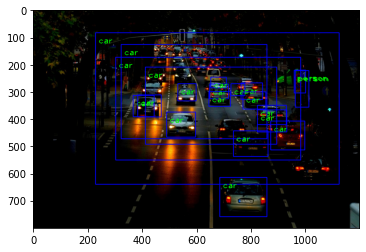

In [15]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

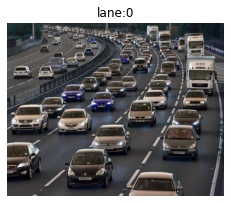

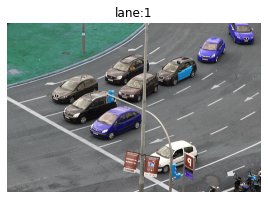

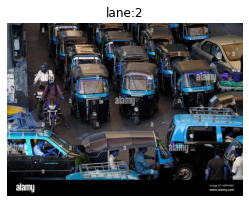

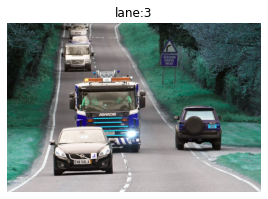

Green signal Allocated to lane : 0  for : 10
 0 seconds remaining.


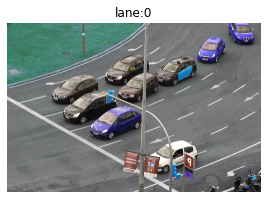

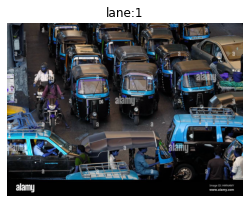

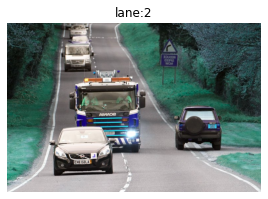

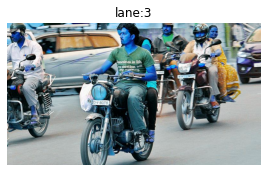

Green signal Allocated to lane : 1  for : 20
 0 seconds remaining.


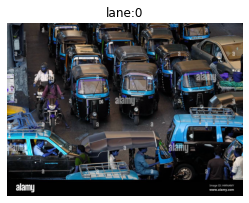

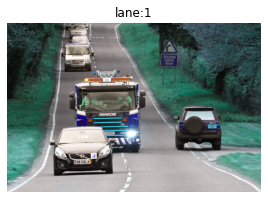

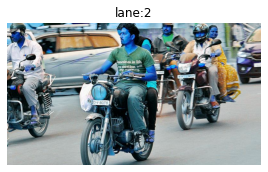

Green signal Allocated to lane : 2  for : 10
 0 seconds remaining.


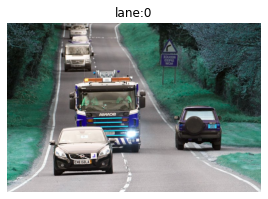

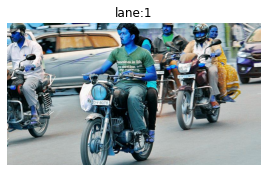

Green signal Allocated to lane : 3  for : 10
 0 seconds remaining.


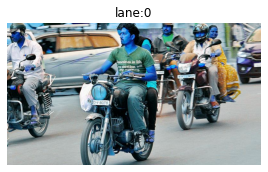

Green signal Allocated to lane : 0  for : 10
 0 seconds remaining.


In [22]:
from matplotlib import pyplot


import time
import sys
def countDown(timem):
    for remaining in range(timem, 0, -1):
        sys.stdout.write("\r")
        sys.stdout.write("{:2d} seconds remaining.".format(remaining))
        sys.stdout.flush()
        time.sleep(1)
    sys.stdout.write("\r")
    sys.stdout.write("{:2d} seconds remaining.".format(0))
    sys.stdout.flush()

def finder(last_lane,density):
    max_threshold=40
    min_threshold = 10
    max_density = max(density)
    if max_density>65:
        max_density_lane = density.index(max_density)
        time_to_allocate = max_density*1
        print("Extreme condition occured! where lane no:",max_density_lane+1,"having the density = ", max_density)
        print("Allocated time :", time_to_allocate,"seconds")
        [last_lane,time_to_allocate]
        countDown(time_to_allocate)
    else:
        curr_lane = (last_lane+1)%4
        lane_density = density[curr_lane]
        time_to_allocate = lane_density*2
        if time_to_allocate>max_threshold:
            time_to_allocate = max_threshold
        elif time_to_allocate<min_threshold:
            time_to_allocate = min_threshold
        last_lane = curr_lane
        return [last_lane,time_to_allocate]
    










def findDensity(images):
    k=0
    ans=[0,0,0,0]
    #plt.imshow(images)
    for i in images:
        img=cv2.imread(r''+i)
        fig = plt.figure(figsize=(10, 7)) 
        rows = 2
        columns = 2
        fig.add_subplot(rows, columns, k+1) 
        plt.axis('off') 
        plt.title("lane:"+str(k))
        pyplot.imshow(img)
        pyplot.show()
        ClassIndex,confidence,bbox=model.detect(img,confThreshold=0.5)
        font_scale=2
        count=0
        font=cv2.FONT_HERSHEY_PLAIN # bounding box text
        for ClassInd,conf,boxes in zip(ClassIndex.flatten(),confidence.flatten(),bbox):
            # configuration of bounding box and associated text
            cv2.rectangle(img,boxes,(255,0,0),2)
            if(classLabels[ClassInd-1]=="car" or classLabels[ClassInd-1]=="motorbike"or classLabels[ClassInd-1]=="truck" or classLabels[ClassInd-1]=="bus"):
                count+=1
            cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,255,0),thickness=2) 
        ans[k]=count
        k+=1
    return ans
last_lane=-1
i=0
images=['Car.jpg','car2.jpg','alto.jpg','car7.jpg','bike.jpeg']
#print("Current Lane      |     Time allocated       | Extreme Condition")
while i<len(images):
    lane_density = findDensity(images[i:i+4])
    last_lane,timer = finder(last_lane,lane_density)
    print("Green signal Allocated to lane :",last_lane," for :", timer)
    countDown(int(timer))
    print()
    i+=1


 1 seconds remaining.

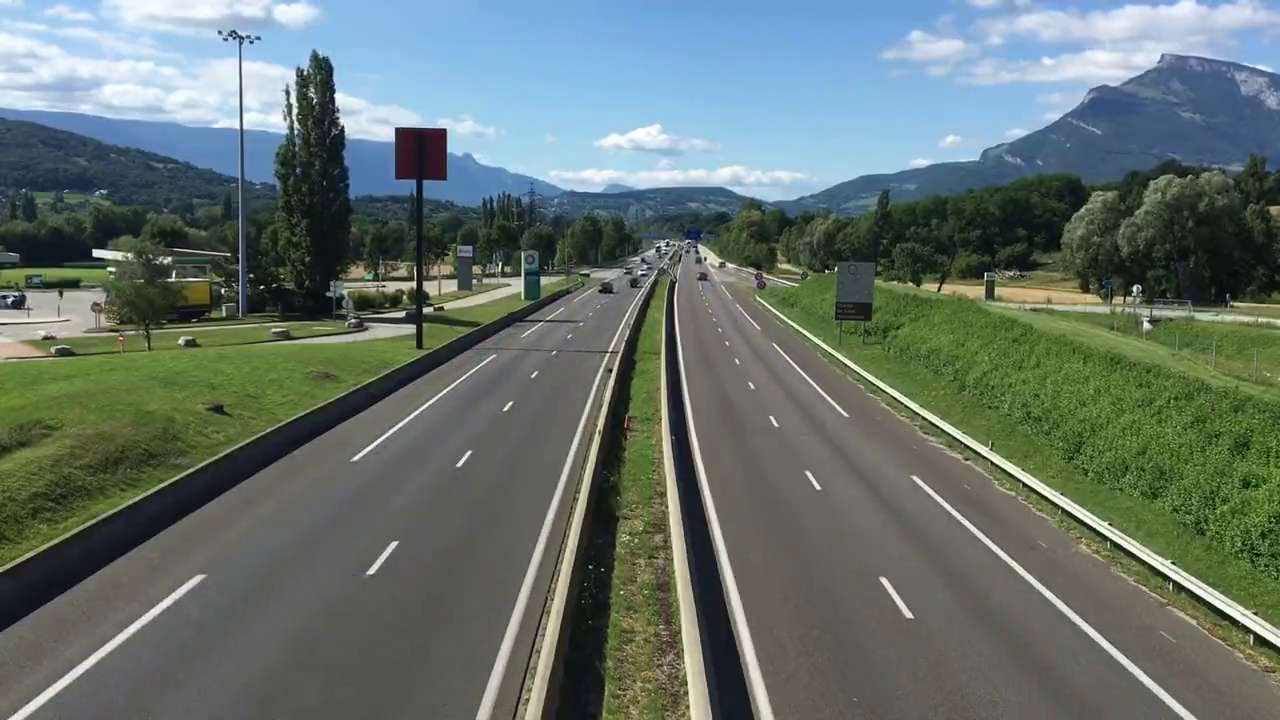

In [ ]:
# Import necessary libraries
import cv2
from IPython.display import display, clear_output, Image
import PIL.Image
import numpy as np

# Load pre-trained YOLO model and configuration
net = cv2.dnn.readNet(r"yolov4-tiny.weights", r"yolov4-tiny.cfg")

# Load class labels
with open(r"coco.names", "r") as f:
    classes = f.read().strip().split("\n")

# Get the names of the output layers
output_layers = net.getUnconnectedOutLayersNames()

# Open the video file
cap = cv2.VideoCapture(r'video.mp4')

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open video / webcam")

font_scale = 2
font = cv2.FONT_HERSHEY_PLAIN

try:
    while True:
        ret, frame = cap.read()
        if not ret:
            print("Failed to capture frame")
            break

        # Preprocess the frame for object detection
        blob = cv2.dnn.blobFromImage(frame, 0.00392, (416, 416), (0, 0, 0), True, crop=False)

        # Forward pass to get output predictions
        net.setInput(blob)
        outs = net.forward(output_layers)

        # Process each output layer
        for out in outs:
            for detection in out:
                scores = detection[5:]
                class_id = np.argmax(scores)
                confidence = scores[class_id]

                # Filter out weak detections and detect vehicles (class_id 2 corresponds to cars in COCO dataset)
                if confidence > 0.5 and class_id == 2:
                    # Get class label
                    class_label = classes[class_id]

                    # Get bounding box coordinates
                    center_x = int(detection[0] * frame.shape[1])
                    center_y = int(detection[1] * frame.shape[0])
                    w = int(detection[2] * frame.shape[1])
                    h = int(detection[3] * frame.shape[0])

                    # Draw bounding box and label on the frame
                    cv2.rectangle(frame, (center_x - w // 2, center_y - h // 2), (center_x + w // 2, center_y + h // 2), (0, 255, 0), 2)
                    cv2.putText(frame, class_label, (center_x, center_y), font, font_scale, (0, 255, 0), thickness=2)

        # Convert frame to RGB for IPython.display
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Display frame using IPython.display
        display(PIL.Image.fromarray(frame_rgb))

        # Clear the previous output for a smoother display
        clear_output(wait=True)

except KeyboardInterrupt:
    pass  # Handle keyboard interrupt (pressing 'q') to exit the loop

cap.release()
cv2.destroyAllWindows()
